# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from library.sb_utils import save_file

In [2]:
data = pd.read_csv("../data/clean_data.csv")

First things first, let's check out what the cleaned data looks like.

In [3]:
data.head(3)

,salary_range,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,function,fraudulent,text
0,0,0,1,0,Other,Internship,Unspecified,Marketing,0,marketing intern us ny new york we re food52 w...
1,0,0,1,0,Full-time,Not Applicable,Unspecified,Customer Service,0,customer service cloud video production nz auc...
2,0,0,1,0,Other,Not Applicable,Unspecified,Other,0,commissioning machinery assistant cma us ia we...


In [4]:
data.describe()

,salary_range,telecommuting,has_company_logo,has_questions,fraudulent
count,1.788000e+04,17880.000000,17880.000000,17880.000000,17880.000000
mean,4.719018e+04,0.042897,0.795302,0.491723,0.048434
std,3.744941e+06,0.202631,0.403492,0.499945,0.214688
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000e+00,0.000000,1.000000,0.000000,0.000000
50%,0.000000e+00,0.000000,1.000000,0.000000,0.000000
75%,0.000000e+00,0.000000,1.000000,1.000000,0.000000
max,4.000000e+08,1.000000,1.000000,1.000000,1.000000


Seems like we either have some extreme outliers in `salary_range`, `min_salary` and `max_salary`, and/or majority of the values are 0. Let's take a peek at what the non-zero/outlying salaries look like.

In [5]:
non_zero_salary = data[data['salary_range']!=0]

In [6]:
# find outliers using IQR
Q1 = np.percentile(non_zero_salary['salary_range'] , 25) 
Q3 = np.percentile(non_zero_salary['salary_range'] , 75)
IQR = Q3 - Q1
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

In [7]:
outliers = []
for salary in non_zero_salary['salary_range'] :
    if ((salary > up_lim) or (salary < low_lim)):
         outliers.append(salary)

In [8]:
non_zero_salary = non_zero_salary[~non_zero_salary['salary_range'].isin(outliers)]

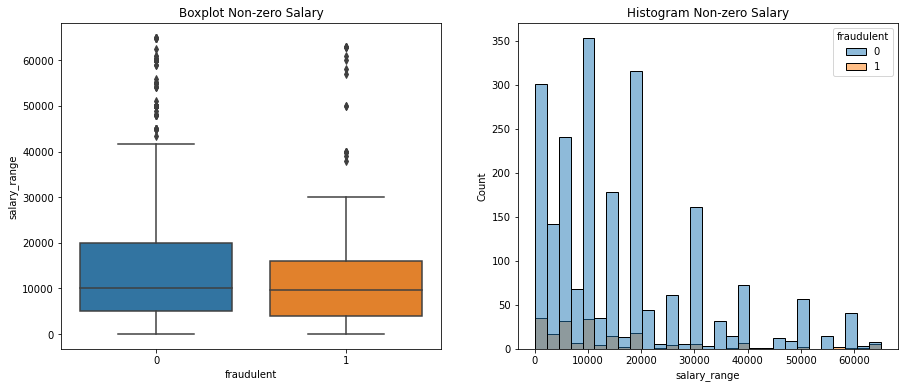

In [9]:
box_title = 'Boxplot Non-zero Salary'
hist_title = 'Histogram Non-zero Salary'
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.boxplot(x='fraudulent', y='salary_range', data=non_zero_salary, ax=axes[0]).set_title(box_title)
sns.histplot(hue='fraudulent', x='salary_range', data=non_zero_salary, ax=axes[1]).set_title(hist_title)
plt.show()

From the plots, it looks like the salaries are pretty low and right skewed, regardless of fraudulence or not.

Time to take another look at some of the other features.

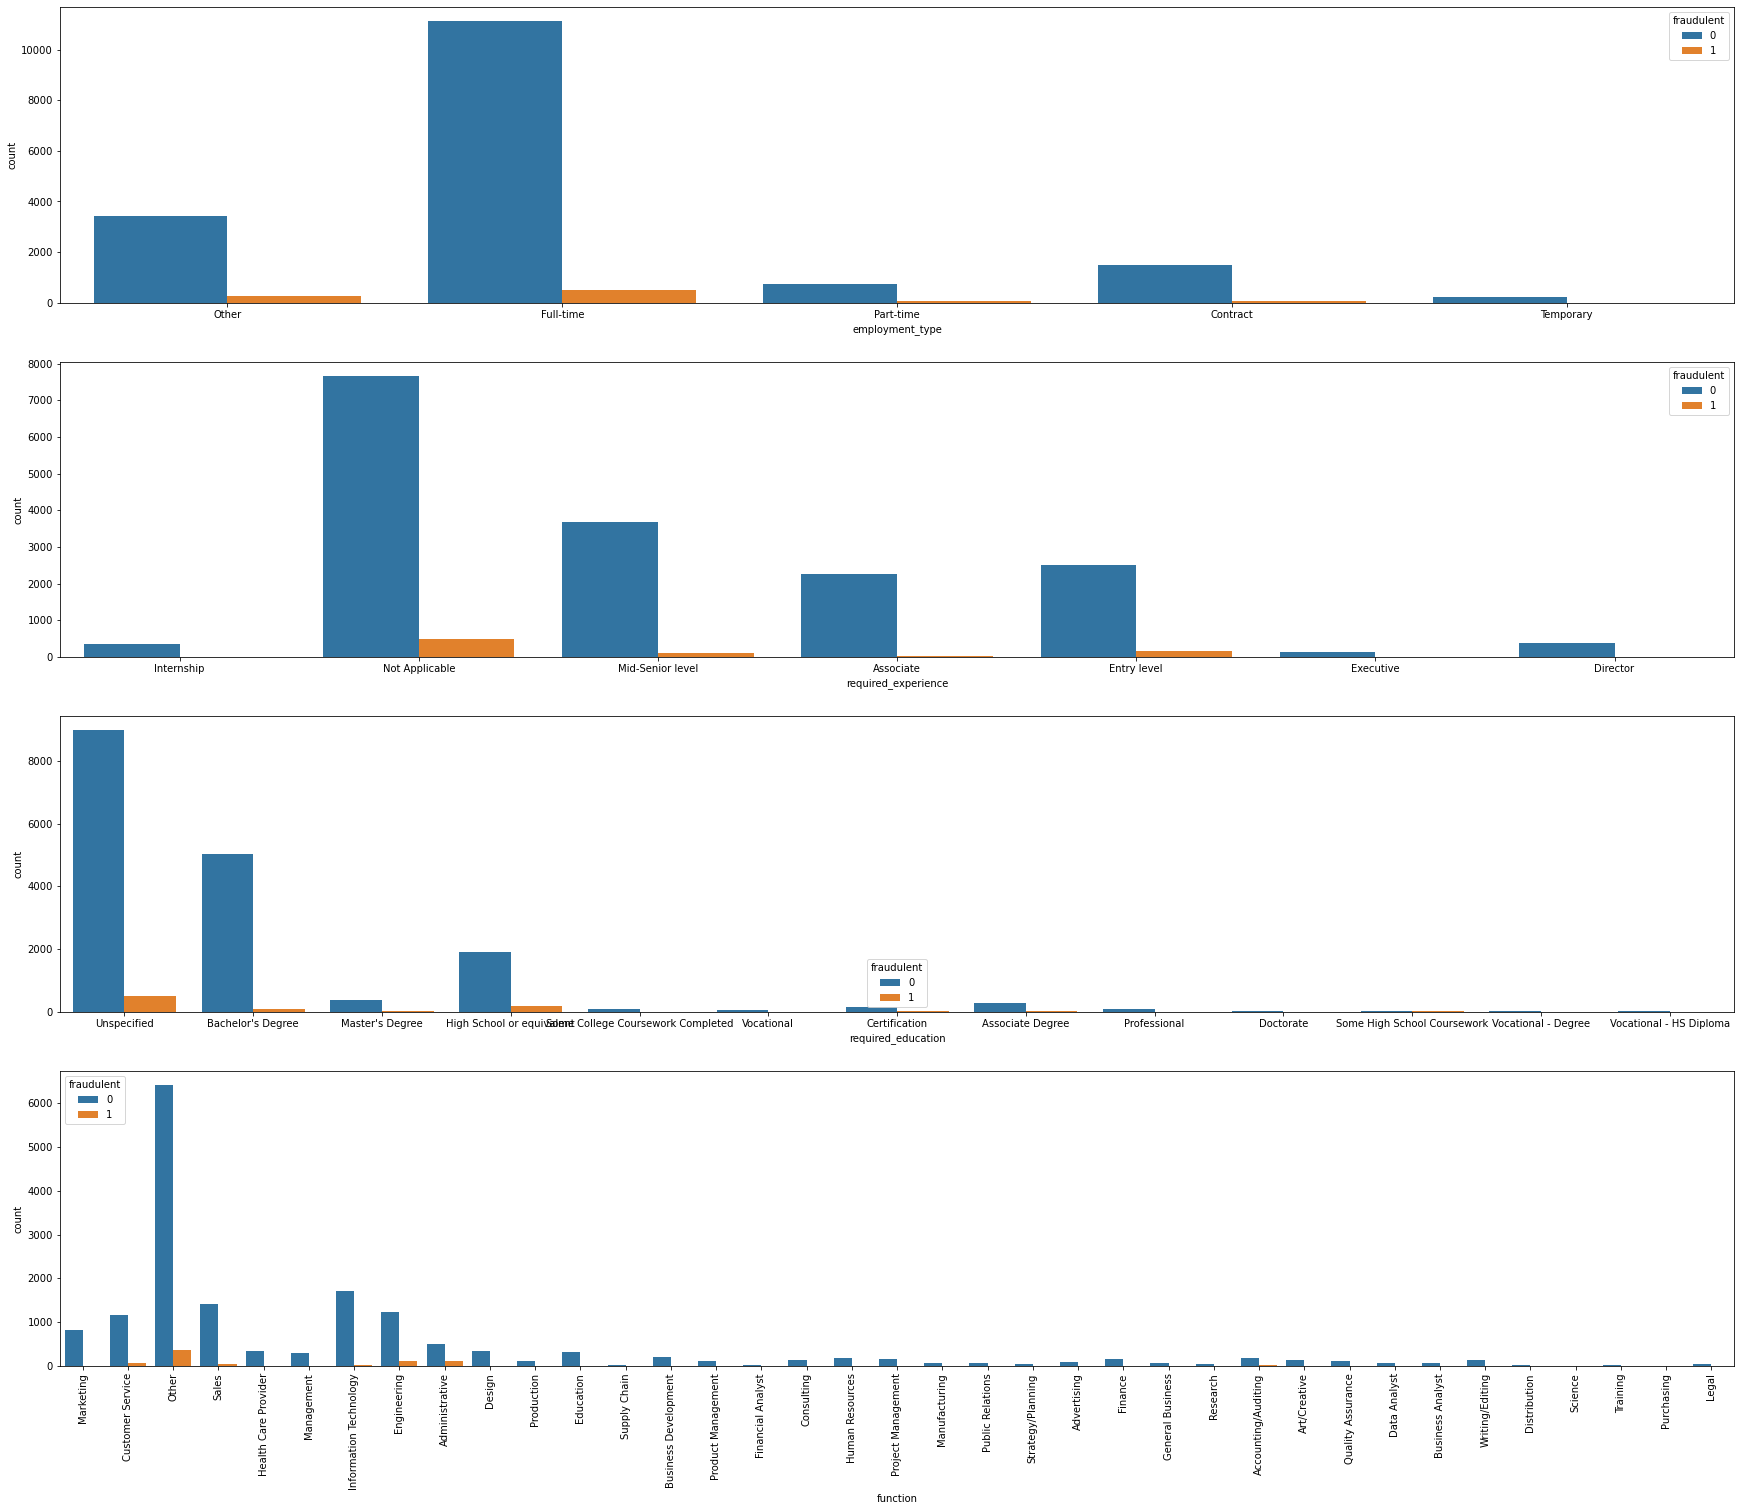

In [10]:
fig, axes = plt.subplots(4, 1, figsize=(30, 25))
plt.xticks(rotation=90)
sns.countplot(x="employment_type", hue="fraudulent", data=data, ax=axes[0])
sns.countplot(x="required_experience", hue="fraudulent", data=data, ax=axes[1])
sns.countplot(x="required_education", hue="fraudulent", data=data, ax=axes[2])
sns.countplot(x="function", hue="fraudulent", data=data, ax=axes[3])
plt.show()

The distributions of real and fake jobs are roughly the same for these features. Mostly full time, unspecified or bachelors education, or an *Other* job fuction. 

Time to take a look at some the binary features.

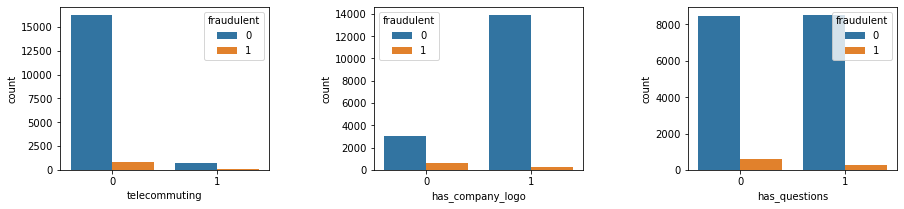

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 3))
sns.countplot(x="telecommuting", hue="fraudulent", data=data, ax=axes[0])
sns.countplot(x="has_company_logo", hue="fraudulent", data=data, ax=axes[1])
sns.countplot(x="has_questions", hue="fraudulent", data=data, ax=axes[2])
plt.subplots_adjust(wspace=0.5)
plt.show()

All of these features are pretty imbalanced, but that was kind of expected.

## Word Clounds

Now, I'll dive into the text data. A word cloud is a nice representation of the the most prominent words that appear in textual data. I'll create two seperate word clouds, one for the real job postings and one for the fake ones.

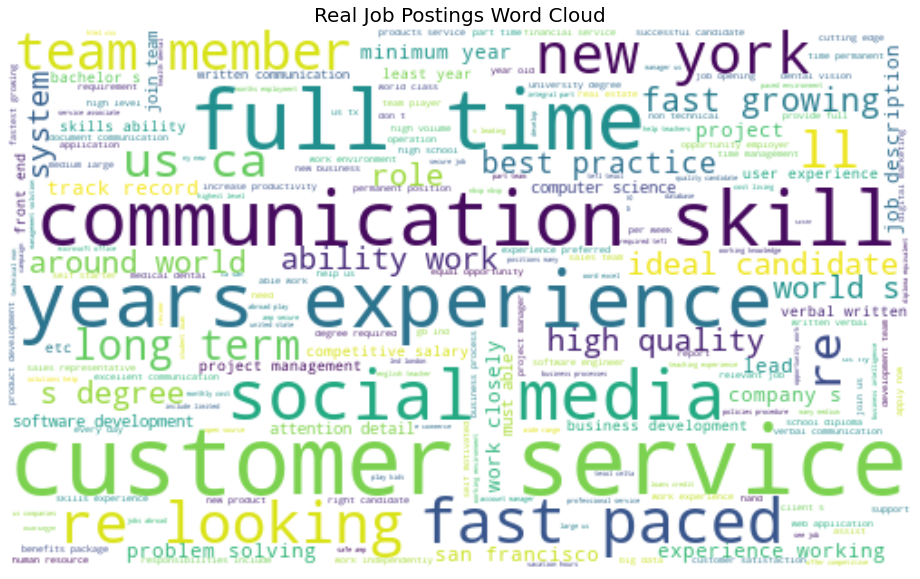

In [13]:
all_words_good = " ".join([review for review in data[data['fraudulent']==0]['text']])
word_cloud_good = WordCloud(width=500, height=300, background_color="white", random_state=1, max_font_size=100).generate(all_words_good)
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud_good, interpolation='bilinear')
plt.axis('off')
plt.title("Real Job Postings Word Cloud", fontsize=20)
plt.show()

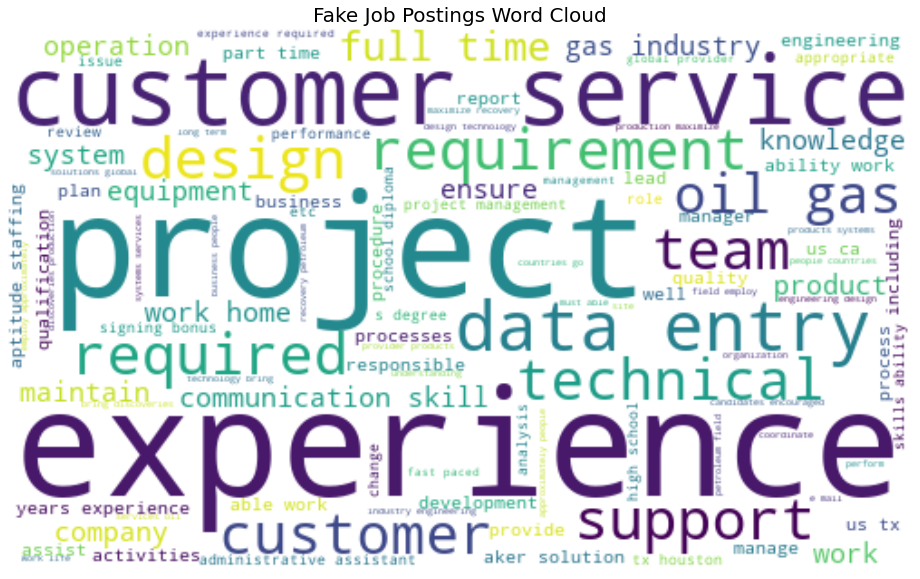

In [14]:
all_words_good = " ".join([review for review in data[data['fraudulent']==1]['text']])
word_cloud_good = WordCloud(width=500, height=300, background_color="white", random_state=1, max_font_size=100).generate(all_words_good)
plt.figure(figsize=(20, 10))
plt.imshow(word_cloud_good, interpolation='bilinear')
plt.axis('off')
plt.title("Fake Job Postings Word Cloud", fontsize=20)
plt.show()

There are a lot of different words in both word clouds, but none of the words really jump out at me for being obviously real or obviously fake.